In [65]:
# !pip install numpy
# !pip install pandas
# !pip install scikit-learn
# !pip install matplotlib
# !pip install seaborn

In [66]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/kaggle/input\playground-series-s5e7\sample_submission.csv
/kaggle/kaggle/input\playground-series-s5e7\test.csv
/kaggle/kaggle/input\playground-series-s5e7\train.csv


In [67]:
train = pd.read_csv("/kaggle/kaggle/input/playground-series-s5e7/train.csv")
test = pd.read_csv("/kaggle/kaggle/input/playground-series-s5e7/test.csv")

In [68]:
train.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [69]:
train.columns

Index(['id', 'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [70]:
train.isna().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [71]:
train["Stage_fear"].value_counts(dropna=False)

Stage_fear
No     12609
Yes     4022
NaN     1893
Name: count, dtype: int64

In [27]:
train["Stage_fear"].dtype

dtype('O')

In [ ]:
train["Social_event_attendance"].value_counts(dropna=False)
train["Going_outside"].value_counts(dropna=False)
train["Drained_after_socializing"].value_counts(dropna=False)
train["Friends_circle_size"].value_counts(dropna=False)
train["Post_frequency"].value_counts(dropna=False)

Post_frequency
3.0     2258
7.0     1827
5.0     1788
6.0     1767
9.0     1744
8.0     1734
4.0     1688
2.0     1291
0.0     1272
NaN     1264
1.0     1214
10.0     677
Name: count, dtype: int64

In [72]:
train["Time_spent_Alone"].fillna(train["Time_spent_Alone"].mean(), inplace=True)
train["Stage_fear"].fillna("No", inplace=True)
train["Social_event_attendance"].fillna(train["Social_event_attendance"].mean(),inplace=True)
train["Going_outside"].fillna(train["Going_outside"].mean(),inplace=True)
train["Drained_after_socializing"].fillna("No", inplace=True)
train["Friends_circle_size"].fillna(train["Friends_circle_size"].mean(),inplace=True)
train["Post_frequency"].fillna(train["Post_frequency"].mean(), inplace=True)

C:\Users\visha\AppData\Local\Temp\ipykernel_21448\4183467305.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Time_spent_Alone"].fillna(train["Time_spent_Alone"].mean(), inplace=True)
C:\Users\visha\AppData\Local\Temp\ipykernel_21448\4183467305.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [73]:
train["Personality"]=train["Personality"].map({"Introvert": 0, "Extrovert": 1})

In [76]:
train["Stage_fear"] = train["Stage_fear"].map({"Yes":1, "No":0, True: 1, False: 0})
train["Drained_after_socializing"] = train["Drained_after_socializing"].map({"Yes":1, "No":0, True: 1, False: 0})
test["Stage_fear"] = test["Stage_fear"].map({"Yes":1, "No":0, True: 1, False: 0})
test["Drained_after_socializing"] = test["Drained_after_socializing"].map({"Yes":1, "No":0, True: 1, False: 0})

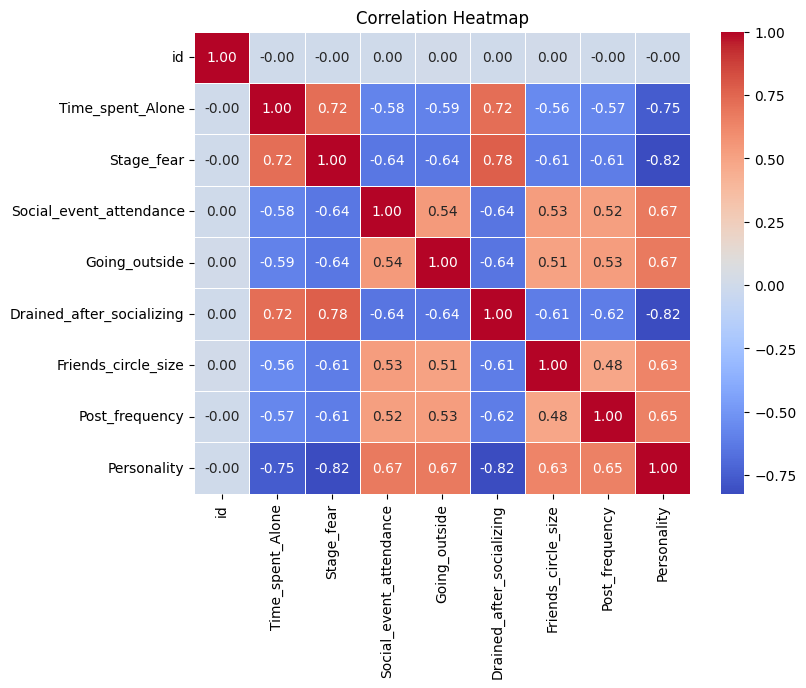

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = train.corr()
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X = train.drop(columns=["Personality", "id"])
y = train["Personality"]

In [45]:
X.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,0.0,0,6.0,4.0,0,15.0,5.000000
1,1.0,0,7.0,3.0,0,10.0,8.000000
2,6.0,1,1.0,0.0,0,3.0,0.000000
3,3.0,0,7.0,3.0,0,11.0,5.000000
4,1.0,0,4.0,4.0,0,13.0,4.982097


In [46]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [51]:
sol=model.predict(test.drop(columns=["id"]))

In [ ]:
personality_map = {0: "Introvert", 1: "Extrovert"}
ans = [personality_map[p] for p in sol]

In [62]:
submission = pd.DataFrame({
    "id": test["id"],
    "Personality": ans
})
submission.to_csv("submission.csv", index=False)